In [43]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.manifold import TSNE
from conv_vae_model import vae

In [24]:
# load data

test_dir = "E:/ML_Project/datasets/images/test"
batch = 32
chn = 3
img_h = 424
img_w = 424
img_shp = (img_h,img_w,chn)

# load test set
test_ds = image_dataset_from_directory(test_dir,
    image_size = (img_h,img_w),
    batch_size = batch,
    shuffle = False,
    labels = None,
    )

Found 11817 files belonging to 1 classes.


In [26]:
test_files = test_ds.file_paths

In [28]:
#cast to float32 from uint8 and prefetch data to GPU

test_ds = test_ds.map(lambda x: tf.cast(x,tf.float32)/255.0,num_parallel_calls = tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [30]:
# instantiate the model
latdim = 64
model = vae(img_shp,latdim = latdim)

In [32]:
#Load weights

model.load_weights('E:/ML_Project/models/conv-vaes/ver2/ver2_kl =0.1,rec=1,per_image_mse,per_image_kl,epoch=10/ver2_kl =0.1,rec=1,per_image_mse,per_image_kl,epoch=10')

In [34]:
# Save paths
latent_space_file_path = "z_test.png"
z_file_path = "z.npy"

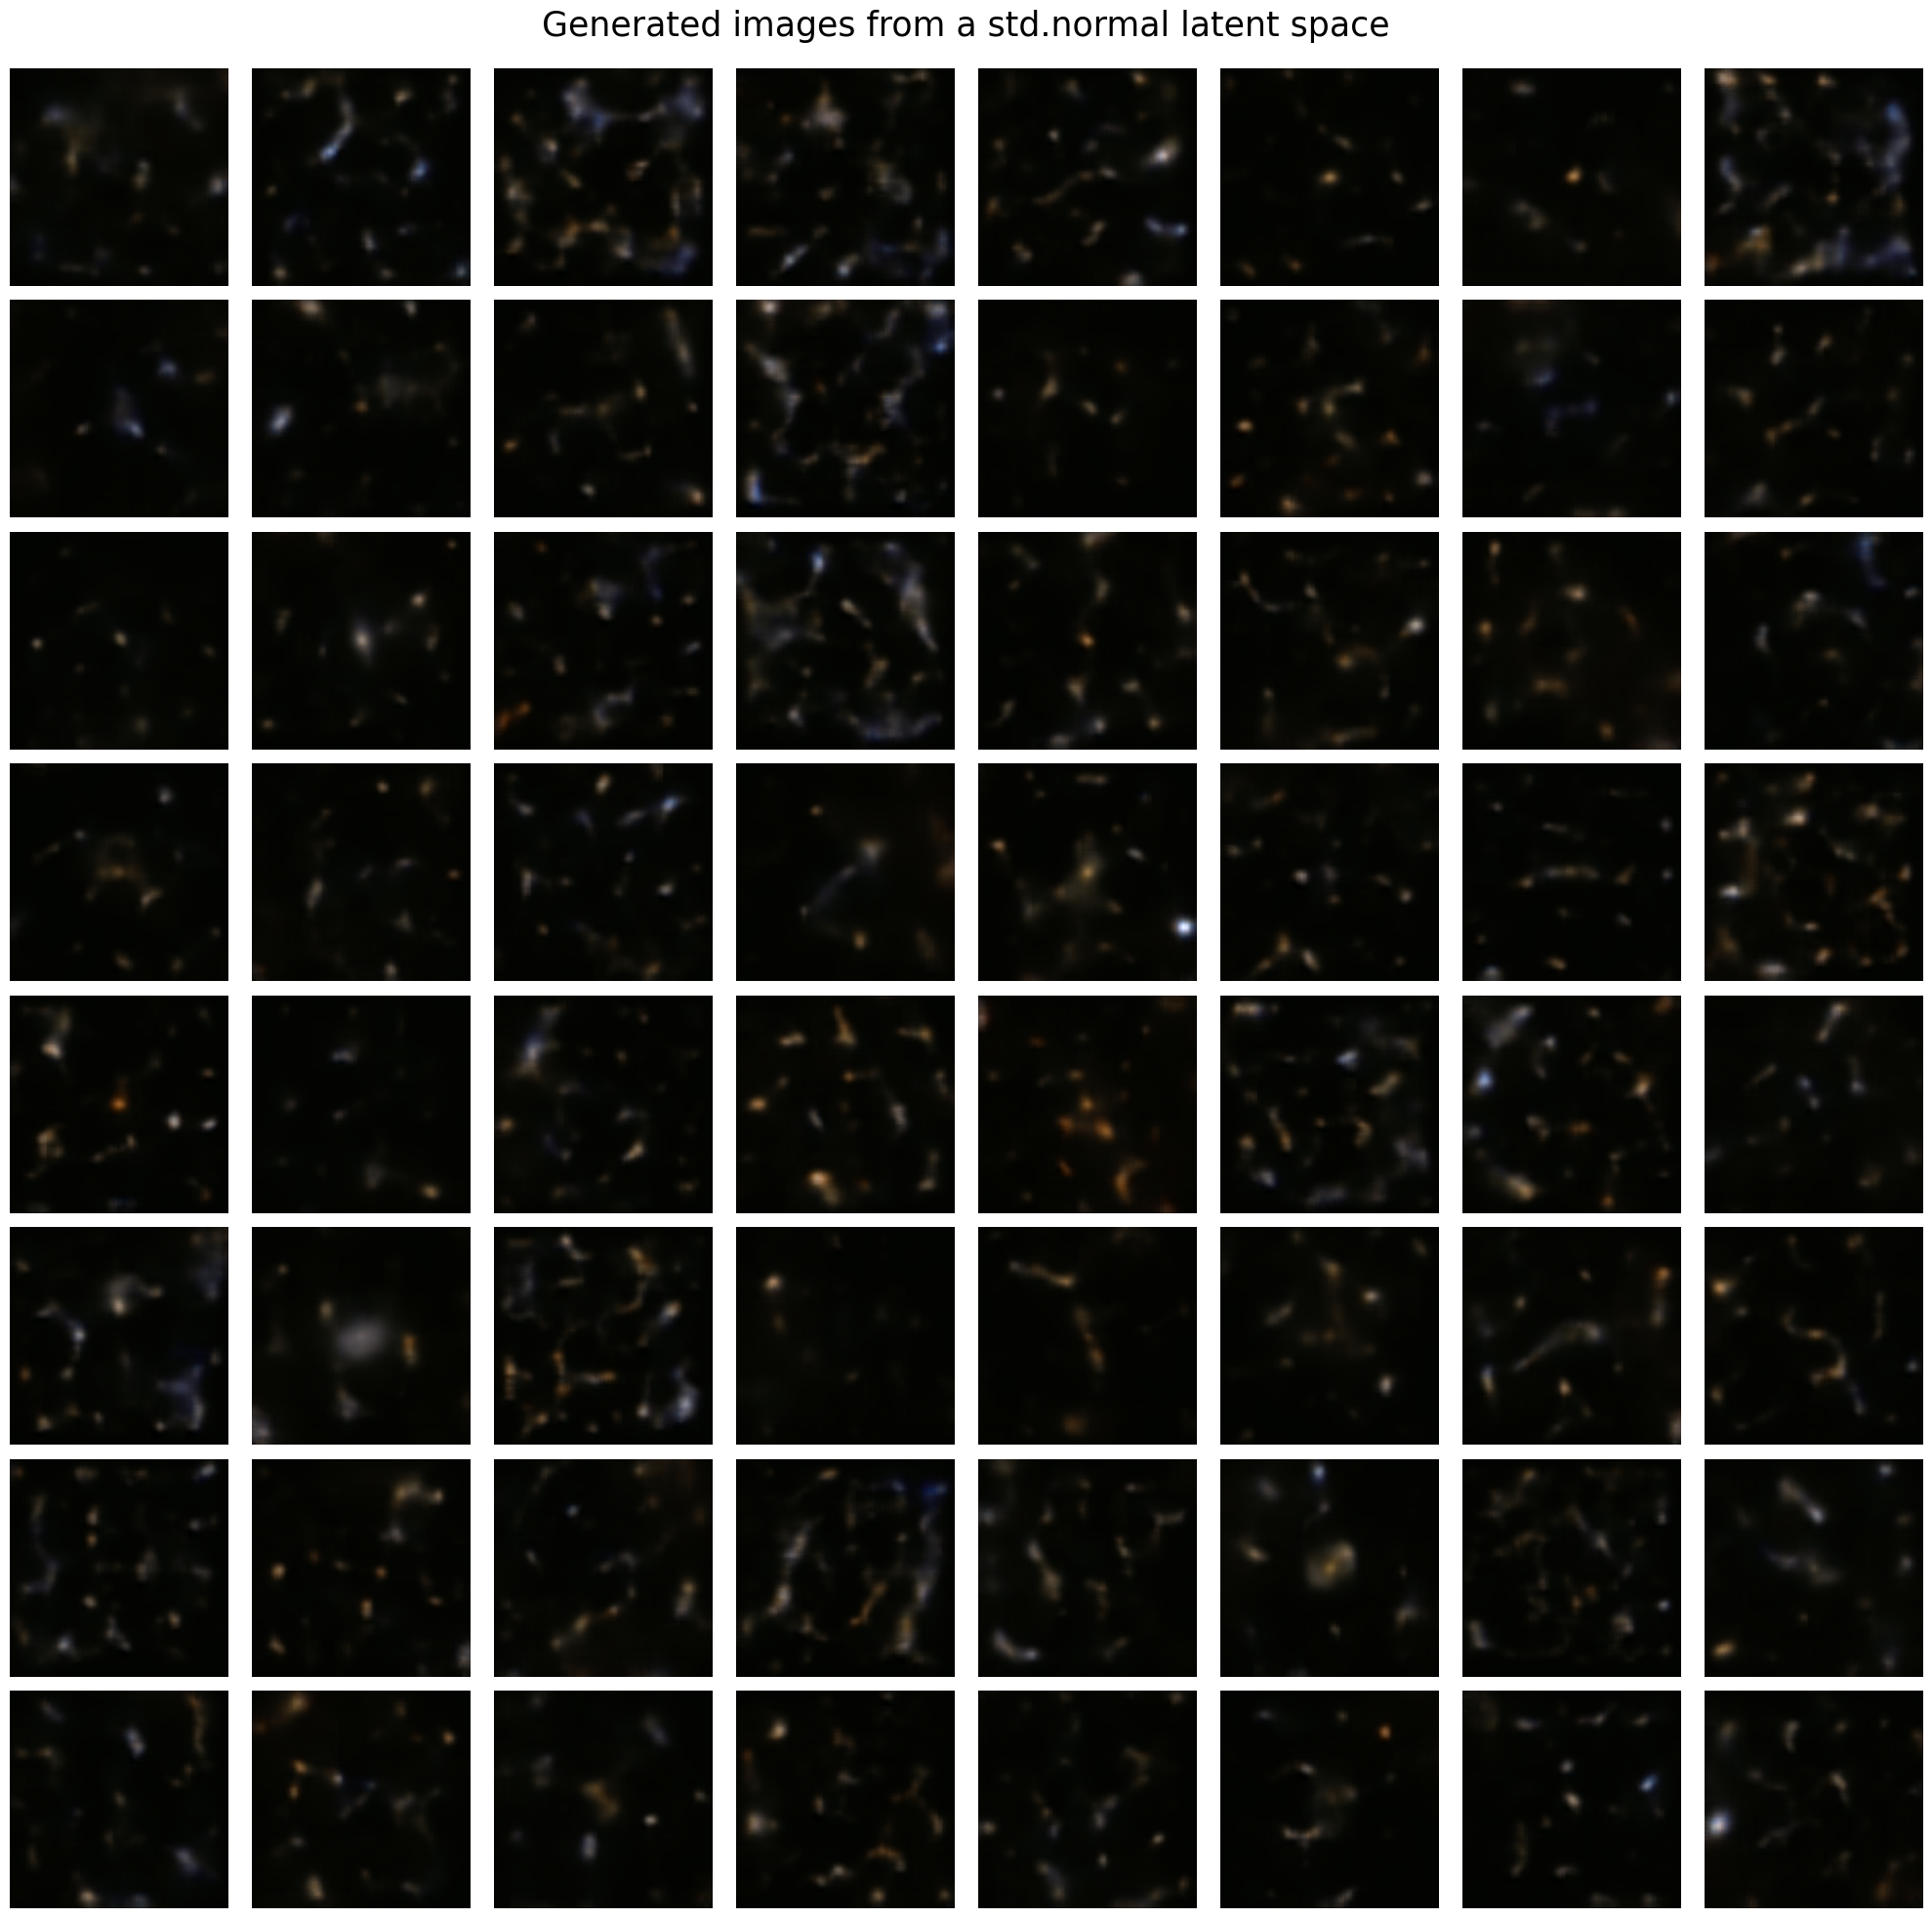

In [36]:
#Generate images from a std.normal latent space

fig, ax = plt.subplots(8,8,figsize = (20,20))
for i in ax.flat:
    test = tf.random.normal((1,latdim),0,1)
    testimg = model.decoder_out(test).numpy()
    testimg = np.clip(testimg,0,1)
    i.imshow(testimg.reshape(424,424,3))
    i.axis('off')

plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.suptitle('Generated images from a std.normal latent space',fontsize = 25)
plt.show()
#fig.savefig(Gen_std_norm_folder_path)

(-0.5, 423.5, 423.5, -0.5)

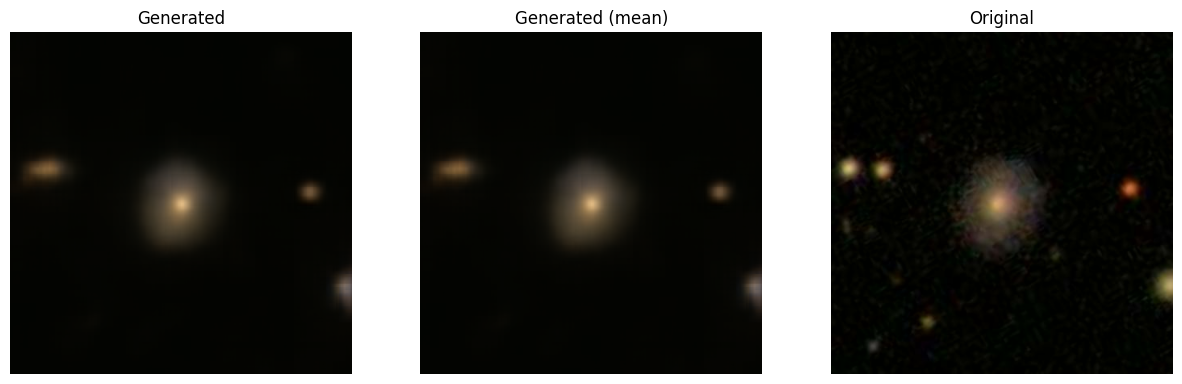

In [40]:
#Test with real input


for i in test_ds.take(1):
    xtest = i[np.random.randint(0,32)].numpy()

mu,logvar,_ = model.encoder_out(xtest.reshape(1,424,424,3))
z = mu + tf.math.exp(0.5 * logvar)*tf.random.normal(tf.shape(mu),0,1)
genimg_1 = model.decoder_out(z).numpy()
genimg_2 = model.decoder_out(mu).numpy()

fig,ax = plt.subplots(1,3,figsize = (15,5))
testimg_1 = np.clip(genimg_1,0,1)
testimg_2 = np.clip(genimg_2,0,1)

ax[0].imshow(testimg_1.reshape(424,424,3))
ax[0].set_title('Generated')
ax[0].axis('off')

ax[1].imshow(testimg_2.reshape(424,424,3))
ax[1].set_title('Generated (mean)')
ax[1].axis('off')

ax[2].imshow(xtest.reshape(424,424,3))
ax[2].set_title('Original')
ax[2].axis('off')

#fig.savefig(Gen_sample_folder_path)

In [53]:
def plot_z(X,model,s,n=2,save = True,path = latent_space_file_path):
    
    z = lat_space(X,model)
    z_stacked = tf.concat(z, axis=0).numpy()

    emb = TSNE(n_components = n).fit_transform(z_stacked)
    
    print(z_stacked.shape)

    fig, ax = plt.subplots(1,1,figsize = (5,5))
    ax.scatter(emb[:,0],emb[:,1],s = s)
    ax.set_title('2D Latent Space')
    plt.show()

    if save == True:
        fig.savefig(path)
        print("Image saved at : ",path)

    
    return z_stacked
    


(165521, 64)


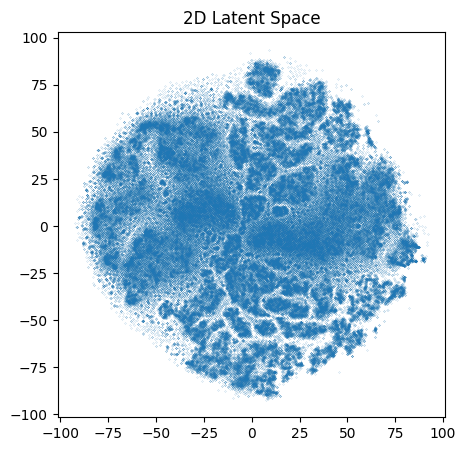

Image saved at :  E:/ML_Project/models/arc1/kl=0.1,rec=1,ep=10,sub,mse\Latent_space.png


In [55]:
z_save = plot_z(train_ds,model,0.01)
np.save(z_folder_path,z_save)

In [25]:
#load z

z_load = np.load(z_folder_path)